In [103]:
from ppget.source import ModelSource
import matplotlib as mplt
mplt.rcParams["figure.figsize"] = (20,5)

start_date = "2007-07-01"
end_date = "2008-07-01"
feature = "Global_active_power"

source = ModelSource.load(start_date, end_date, feature)
source.missing_data()

Series([], Freq: 10T, Name: Global_active_power, dtype: float64)

In [104]:
series = source.series()
series.head()

timestamp
2007-07-01 00:00:00    2.6812
2007-07-01 00:10:00    2.6502
2007-07-01 00:20:00    2.6266
2007-07-01 00:30:00    2.5242
2007-07-01 00:40:00    2.6000
Freq: 10T, Name: Global_active_power, dtype: float64

In [105]:
import pandas as pd
from sklearn.cluster import KMeans

clusters = range(1, 12)

def diminishing_returns(range, X):
    inertia = []
    for k in range:
        m = KMeans(n_clusters=k).fit(X)
        m.fit(X)
        inertia.append(m.inertia_)

    return inertia

kw_hour = pd.DataFrame(zip(list(series.values),list(series.index.hour)))
kw_hour.columns = ["kw", "hour"]
kw_hour.describe()

,kw,hour
count,52704.000000,52704.000000
mean,1.120798,11.500000
std,1.073177,6.922252
min,0.098000,0.000000
25%,0.296800,5.750000
50%,0.630800,11.500000
75%,1.582450,17.250000
max,8.514600,23.000000


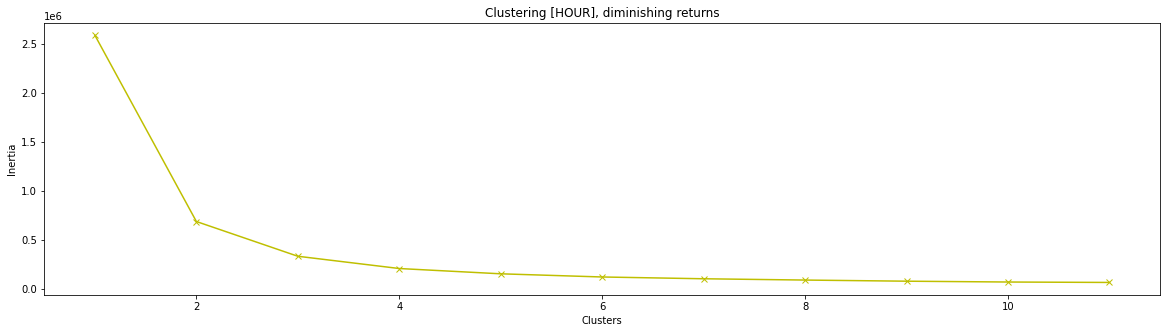

In [106]:
import matplotlib.pyplot as plt

daily_inertia = diminishing_returns(clusters, kw_hour)

plt.plot(clusters, daily_inertia, 'yx-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clustering [HOUR], diminishing returns')
plt.show()

In [107]:
h_kmeans = KMeans(n_clusters=4).fit(kw_hour)
centroids = h_kmeans.cluster_centers_
print(centroids)

[[ 1.13168493 14.49943065]
 [ 0.47228017  2.5       ]
 [ 1.62169694 20.49920328]
 [ 1.257419    8.5       ]]


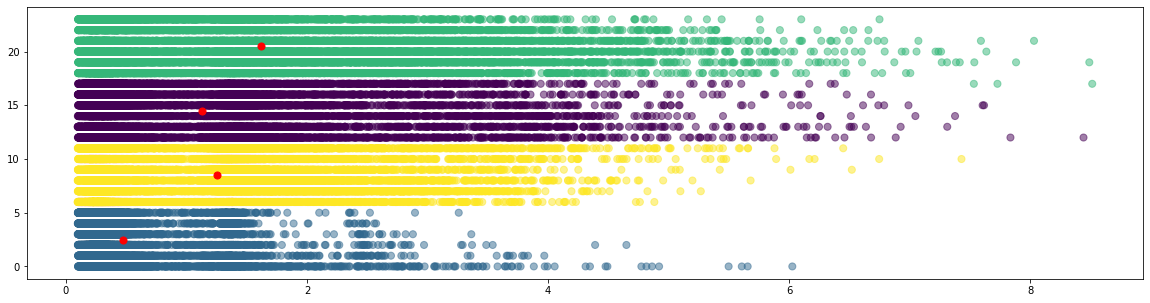

In [108]:
plt.scatter(kw_hour["kw"], kw_hour["hour"], c=h_kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## Clustering by Day of the Week:

In [115]:
kw_day_of_week = pd.DataFrame(zip(list(series.values),list(series.index.dayofweek)))
kw_day_of_week.columns = ["kw", "day_of_week"]
kw_day_of_week.describe()

,kw,day_of_week
count,52704.000000,52704.000000
mean,1.120798,3.000000
std,1.073177,2.006838
min,0.098000,0.000000
25%,0.296800,1.000000
50%,0.630800,3.000000
75%,1.582450,5.000000
max,8.514600,6.000000


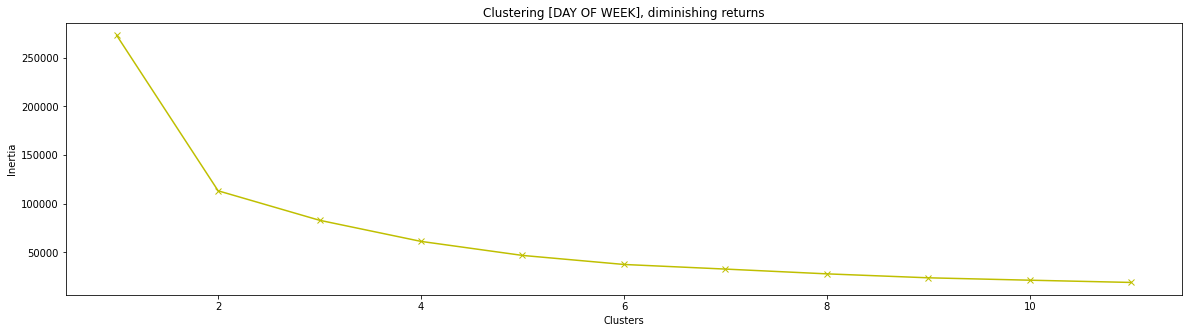

In [118]:
weekly_inertia = diminishing_returns(clusters, kw_day_of_week)

plt.plot(clusters, weekly_inertia, 'yx-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clustering [DAY OF WEEK], diminishing returns')
plt.show()

In [129]:
dow_kmeans = KMeans(n_clusters=4).fit(kw_day_of_week)
centroids = dow_kmeans.cluster_centers_
print(centroids)

[[0.8320055  2.48658867]
 [0.78335241 5.02517088]
 [1.06194366 0.49231179]
 [3.25369953 4.44157583]]


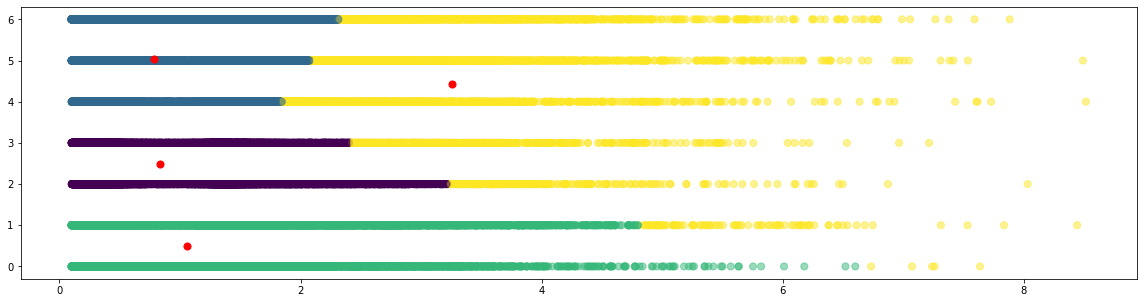

In [130]:
plt.scatter(kw_day_of_week["kw"], kw_day_of_week["day_of_week"], c=dow_kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## Clustering by Month:

In [131]:
kw_month = pd.DataFrame(zip(list(series.values),list(series.index.month)))
kw_month.columns = ["kw", "month"]
kw_month.describe()

,kw,month
count,52704.000000,52704.000000
mean,1.120798,6.513661
std,1.073177,3.451267
min,0.098000,1.000000
25%,0.296800,4.000000
50%,0.630800,7.000000
75%,1.582450,10.000000
max,8.514600,12.000000


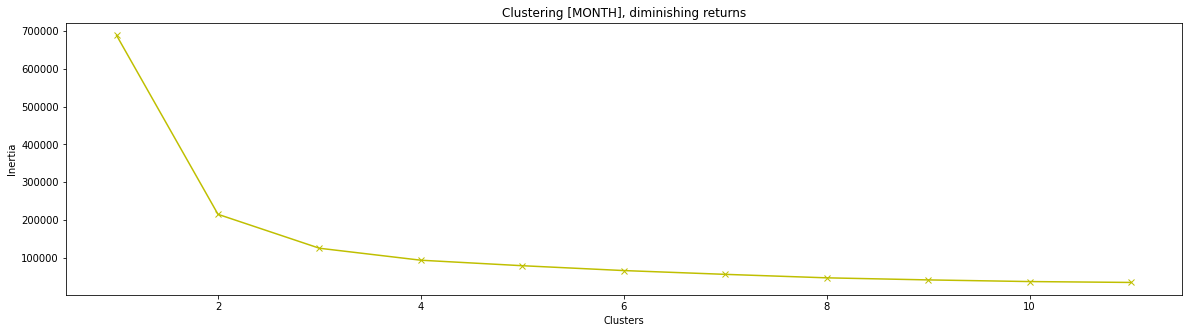

In [132]:
monthly_inertia = diminishing_returns(clusters, kw_month)

plt.plot(clusters, monthly_inertia, 'yx-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clustering [MONTH], diminishing returns')
plt.show()

In [140]:
kmeans = KMeans(n_clusters=3).fit(kw_month)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.25428406  2.49644251]
 [ 0.86007639  6.50423585]
 [ 1.25113094 10.50791121]]


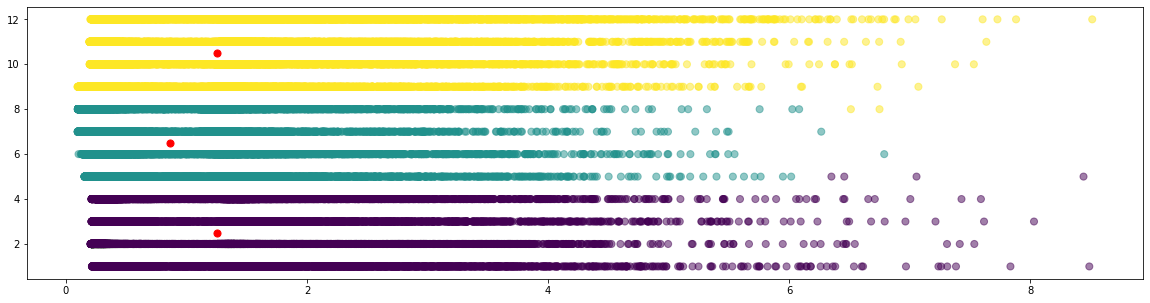

In [141]:
plt.scatter(kw_month["kw"], kw_month["month"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()